In [ ]:
from google.colab import files
from google.colab import drive
import os

In [32]:
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [33]:
os.chdir('/content/gdrive/MyDrive')

In [36]:
!pwd

/content/gdrive/MyDrive


In [37]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
def cartoonify(img_rgb):
    '''
    converts an image into a cartoon version of itself
    '''
    numBilateralFilters = 7  # number of bilateral filtering steps

    # -- STEP 1 --
    img_color = img_rgb
    # repeatedly apply small bilateral filter instead of applying
    # one large filter
    # This is what is responsible for the "cartoon effet"
    for _ in range(numBilateralFilters):
        img_color = cv2.bilateralFilter(img_color, 15, 30, 20)

    #return img_color
    # The following steps do edge detection and try to add a 
    # border to the image
    # -- STEPS 2 and 3 --
    # convert to grayscale and apply median blur
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.medianBlur(img_gray, 7)

    # -- STEP 4 --
    # detect and enhance edges
    img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                     cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, 3, 2)

    # -- STEP 5 --
    # convert back to color so that it can be bit-ANDed with color image
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
    return cv2.bitwise_and(img_color, img_edge)

def evaluate(trained_model, real_image):
    """Evaluate the model output for 'real_image' as the input.
    Also, display display all the images side by side"""
    test_input = np.expand_dims(real_image, 0)
    pred_output = trained_model.predict(test_input)
    f, axarr = plt.subplots(1,3, figsize=(12,12))
    # OpenCV stores the images in BGR format rather than RGB, so
    # it needs to be converted to RGB so that matplotlib reads the 
    # colors properly.
    axarr[0].imshow(cv2.cvtColor(real_image, cv2.COLOR_BGR2RGB), interpolation='bilinear')
    axarr[0].set_title('Real image')
    axarr[0].axis('off')
    axarr[2].imshow(cv2.cvtColor(pred_output[0], cv2.COLOR_BGR2RGB), interpolation='bilinear')
    axarr[2].set_title('Model output')
    axarr[2].axis('off')
    # OpenCV requires pixels to have integer values between 0 and 255 rather than fractions
    # between 0 and 1.
    expected_image = cartoonify(np.array(real_image*255, dtype=np.uint8))
    axarr[1].imshow(cv2.cvtColor(expected_image, cv2.COLOR_BGR2RGB), interpolation='bilinear')
    axarr[1].set_title('Program output')
    axarr[1].axis('off')
    plt.show()

In [39]:
# Train the model on a gpu and load the trained model
from tensorflow.python.keras.models import load_model
trained_model = load_model('trained_model')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


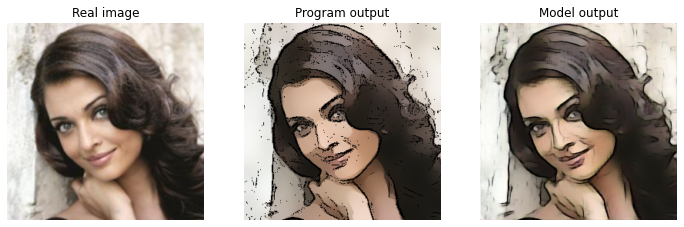

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


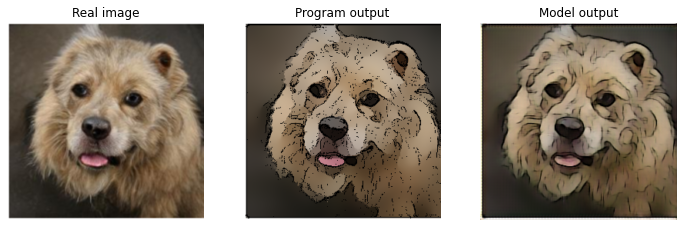

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


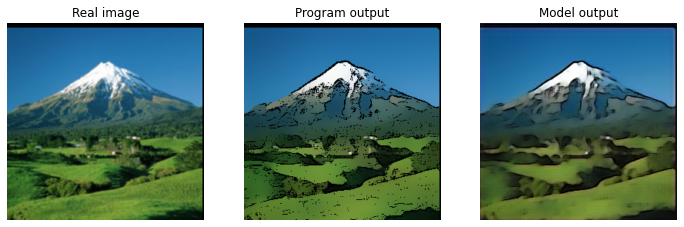

In [65]:
rand_img = cv2.imread('/content/gdrive/MyDrive/test/aishwarya.png')
rand_img = rand_img.astype('float32') / 255
evaluate(trained_model, rand_img)
rand_img = cv2.imread('/content/gdrive/MyDrive/test/dog.png')
rand_img = rand_img.astype('float32') / 255
evaluate(trained_model, rand_img)
rand_img = cv2.imread('/content/gdrive/MyDrive/test/mountain.png')
rand_img = rand_img.astype('float32') / 255
evaluate(trained_model, rand_img)

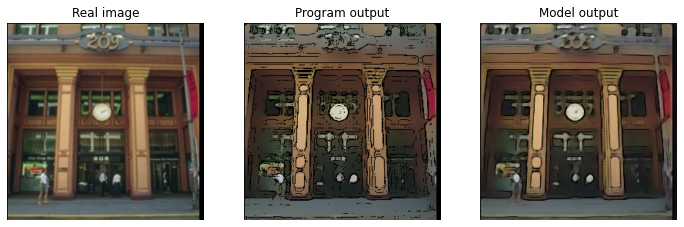

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


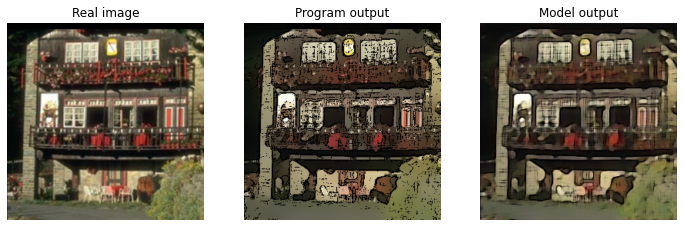

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


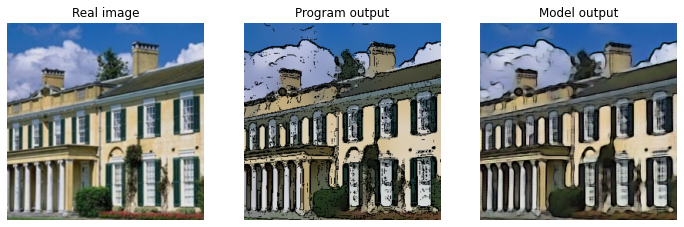

In [66]:
rand_img = cv2.imread('/content/gdrive/MyDrive/test/sample_1.png')
rand_img = rand_img.astype('float32') / 255
evaluate(trained_model, rand_img)
rand_img = cv2.imread('/content/gdrive/MyDrive/test/sample_2.png')
rand_img = rand_img.astype('float32') / 255
evaluate(trained_model, rand_img)
rand_img = cv2.imread('/content/gdrive/MyDrive/test/sample_11.png')
rand_img = rand_img.astype('float32') / 255
evaluate(trained_model, rand_img)